In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# train 데이터셋 불러오기
data = pd.read_csv('./data/dataset_malwares.csv', sep=',')

# 라벨링 되어 있는 것이 target {0=Benign, 1=Malware}
X = data.drop(['Name','Malware'], axis=1)
y = data['Malware']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=4)
X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
8607,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,2,0,0,64784,225280,0,0
18443,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,11,121,4,32064,37392,40960,0,0
2222,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,63,0,0,308436,454656,0,528896
10610,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,3,78,0,0,59492,90112,0,512000
16387,23117,80,2,0,4,15,65535,0,184,0,...,3221225536,0,8,98,0,0,57344,73728,0,0


In [4]:
print(f'총 NUll Value 개수 : {X_train.isnull().any().sum()}')

총 NUll Value 개수 : 0


[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

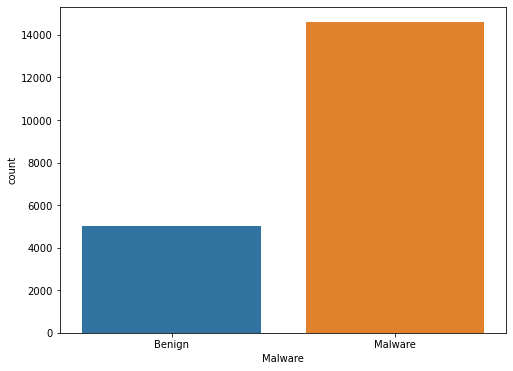

In [5]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data['Malware'])
ax.set_xticklabels(['Benign', 'Malware'])

In [6]:
# feature scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [7]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
X_new.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,0.0,-0.032017,-0.046005,-0.038972,-0.036814,-0.037854,0.148107,-0.017553,-0.030291,-0.02722,...,0.100633,0.0,-0.810821,-0.787571,-0.093030,-0.016210,-0.067583,-0.044641,-0.018875,-0.039670
1,0.0,-0.032017,-0.046005,-0.038972,-0.036814,-0.037854,0.148107,-0.017553,-0.030291,-0.02722,...,0.100633,0.0,0.781767,0.148846,-0.067946,-0.014895,-0.073261,-0.069987,-0.018875,-0.039670
2,0.0,-0.032017,-0.046005,-0.038972,-0.036814,-0.037854,0.148107,-0.017553,-0.030291,-0.02722,...,0.100633,0.0,-0.810821,-0.307559,-0.093030,-0.016210,-0.017077,-0.013100,-0.018875,-0.014490
3,0.0,-0.032017,-0.046005,-0.038972,-0.036814,-0.037854,0.148107,-0.017553,-0.030291,-0.02722,...,0.100633,0.0,-0.492303,-0.189523,-0.093030,-0.016210,-0.068680,-0.063228,-0.018875,-0.015295
4,0.0,-0.097089,-0.046663,-0.038972,-0.036814,-0.021425,0.148107,-0.017553,-0.030291,-0.02722,...,0.100633,0.0,0.303990,-0.032142,-0.093030,-0.016210,-0.069125,-0.065481,-0.018875,-0.039670


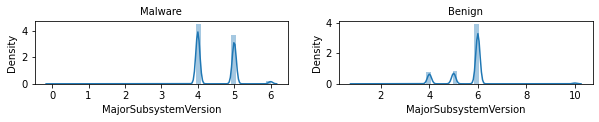

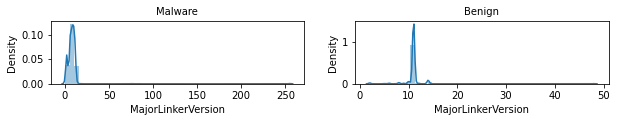

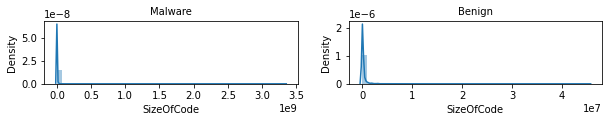

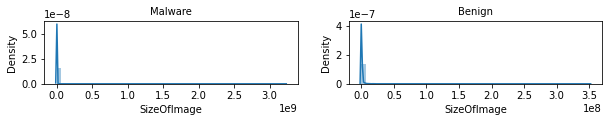

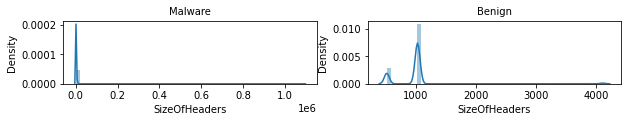

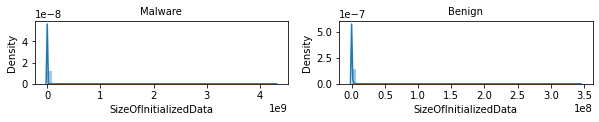

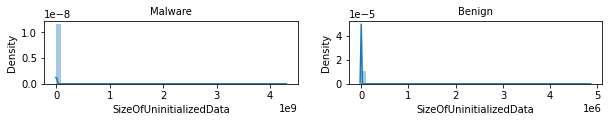

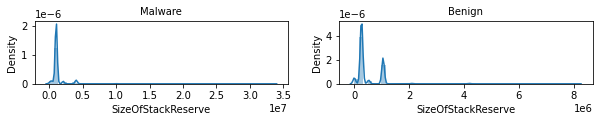

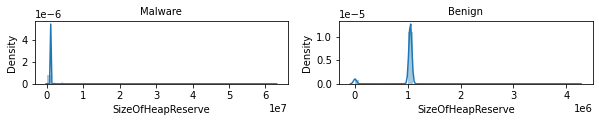

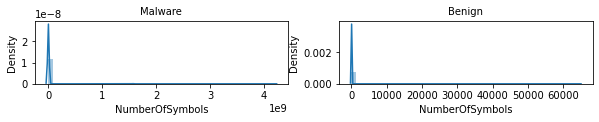

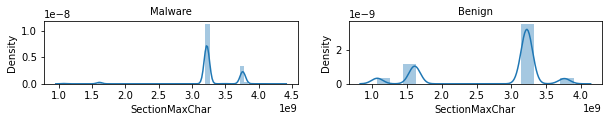

In [9]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData', 
            'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve', 
            'NumberOfSymbols', 'SectionMaxChar']
i=1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(data[data['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2

#### Malware와 Benign과 차이가 많이 난 특성들

*MajorsubsystemVersion* : 하위 시스템의 주 버전 번호를 가져온다  

*MajorLinkerVersion* : 파일을 만들어낸 링커의 버전  

*SizeOfHeaders* : FileAlignment의 배수로 반올림된 MS DOS 스텁, PE 헤더 및 섹션 헤더의 결합된 크기를 가져온다  

*SizeOfHeapReserve* : 예약할 로컬 힙 공간의 크기를 가져옵니다  


In [10]:
print(f'X_train 사용된 특성 개수 : {X_train.shape[1]}')
print(f'X_test 사용된 특성 개수 : {X_test.shape[1]}')

X_train 사용된 특성 개수 : 77
X_test 사용된 특성 개수 : 77


In [11]:
skpca = PCA(n_components=55)
X_pca = skpca.fit_transform(X_new)

### 모델 생성 (랜덤 포레스트)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=0, oob_score=True, max_depth= 16)
model.fit(X_pca, y_train)

RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [14]:
X_test_scaled = scaler.transform(X_test)
X_new_test = pd.DataFrame(X_test_scaled, columns = X.columns)
X_test_pca = skpca.transform(X_new_test)

In [15]:
y_pred = model.predict(X_test_pca)

### 결과

In [16]:
print(classification_report(y_pred, y_test, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96       946
     Malware       0.99      0.98      0.99      2977

    accuracy                           0.98      3923
   macro avg       0.97      0.98      0.98      3923
weighted avg       0.98      0.98      0.98      3923



### Confusion matrix

Text(33.0, 0.5, 'True labels')

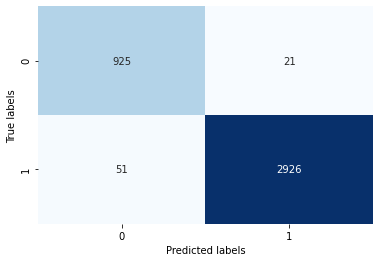

In [17]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

### feature별 중요도 확인

Text(0.5, 1.0, 'Features importance')

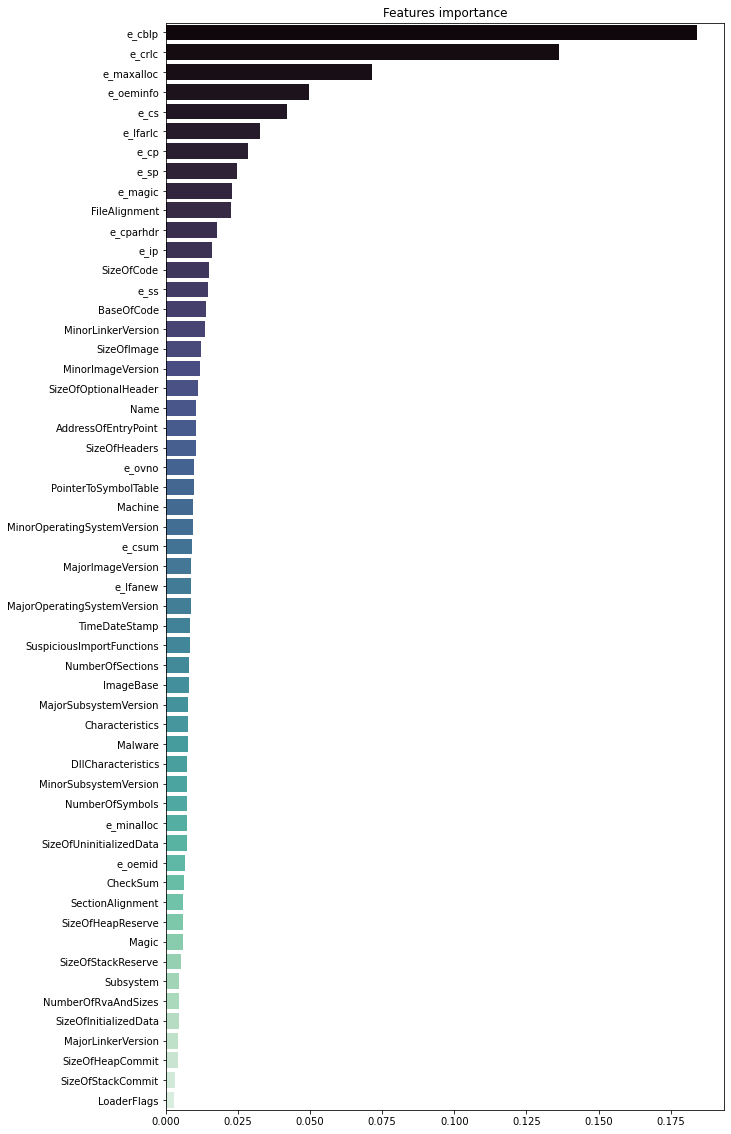

In [18]:
importance = model.feature_importances_
importance_dict = {data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')

In [19]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scale', scaler),('pca', skpca),('clf', model)])

In [20]:
test = pd.read_csv('./data/dataset_test.csv', sep=',')
X_testing = test.drop('Name', axis = 1)

X_testing_scaled = pipe.named_steps['scale'].transform(X_testing)
X_testing_pca = pipe.named_steps['pca'].transform(X_testing_scaled)
y_testing_pred = pipe.named_steps['clf'].predict_proba(X_testing_pca)

In [21]:
pd.concat([test['Name'], pd.DataFrame(y_testing_pred)], axis = 1)

,Name,0,1
0,Skype-8.10.0.9.exe,0.955000,0.045000
1,vlc-3.0.2-win64.exe,0.617564,0.382436
2,stinger32.exe,0.120135,0.879865
3,SpotifyFullSetup.exe,0.649978,0.350022
4,uftp_english.exe,0.433407,0.566593
5,161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...,0.205721,0.794279
6,eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...,0.000769,0.999231
7,reverse_shell.exe,0.040000,0.960000
8,873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...,0.070504,0.929496
9,ScratchInstaller1.4.exe,0.351915,0.648085
